# Import libraries

In [13]:
# For data manipulation
import pandas as pd
import numpy as np 

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns 

# For data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# For data modeling
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# Load dataset

In [14]:
df = pd.read_csv('assets/insurance.csv')
df = df.drop(['region'], axis = 1)
df.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


# Encoding categorical data

In [15]:
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])

# Data visualization

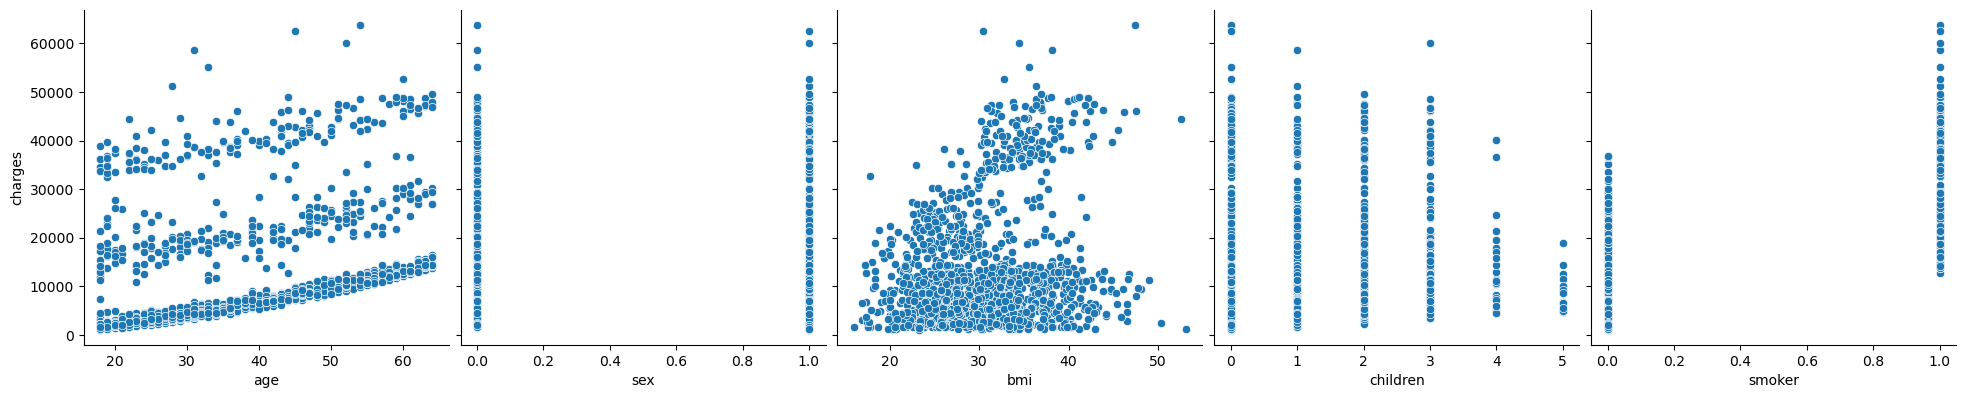

In [16]:
sns.pairplot(df, x_vars=['age', 'sex', 'bmi', 'children', 'smoker'], y_vars='charges', height=4, aspect=1, kind='scatter')

<Axes: >

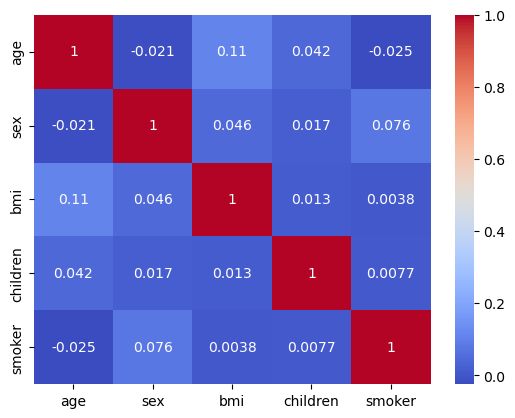

In [17]:
corr = df[['age', 'sex', 'bmi', 'children', 'smoker']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Split data

In [18]:
x = df[['age', 'sex', 'bmi', 'children', 'smoker']]
y = df['charges']

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

# Feature Scalling

In [20]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Modelling

In [21]:
linear_model = LinearRegression()
linear_model.fit(x_train_scaled, y_train)

LinearRegression()

# Predicted

In [22]:
y_pred = linear_model.predict(x_test_scaled)

# Eval

In [23]:
mse = mean_squared_error(y_test, y_pred)
r2_score = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'MSE Score : {mse}')
print(f'R2 Score : {r2_score}')
print(f'MAE Score : {mae}')

MSE Score : 31929596.87338222
R2 Score : 0.780095696440481
MAE Score : 3896.0787054694943


# Visualize Model

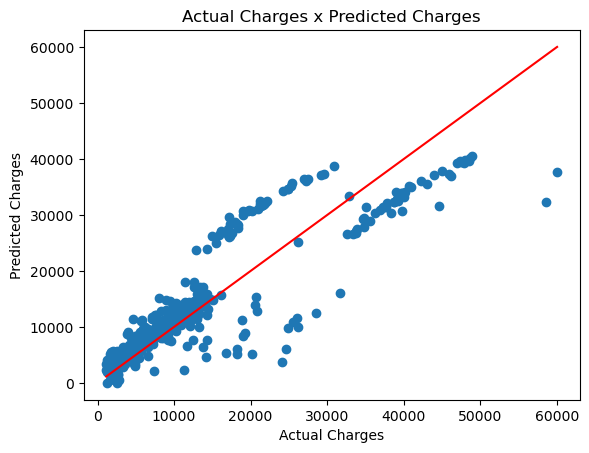

In [24]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual Charges x Predicted Charges')
plt.show()